In [2]:
import pandas as pd
import string
import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.style

In [3]:
# import os
# os.chdir('C:\\GL Class\\Solution Preparation\EDA')
df= pd.read_csv('C:/Users/Nandhini/Downloads/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.describe(include="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


Keypoints: 
    *The minimum and maximum values give the range of values in the dataset for columns like "step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", and "newbalanceDest".
    *The most frequent values in some columns are as follows:
    type: The most frequent transaction type is "CASH_OUT".
    nameOrig: The most frequent customer who initiated transactions is "C1902386530".
    nameDest: The most frequent recipient of transactions is "C1286084959".

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 6362620 
The number of columns (variables) is 11


In [7]:
df.duplicated().sum()

0

In [8]:
# Check the data types and formats
print(df.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


There are no missing values and duplicate values in Dataset.

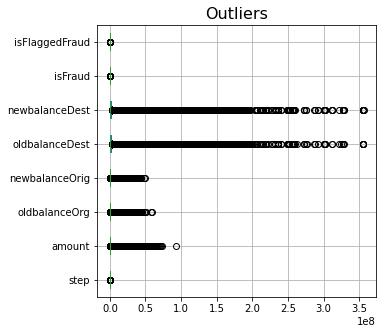

In [11]:
#Let's check for outliers in our numerical variables
numerical = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(5,5))
df[numerical].boxplot(vert=0)
plt.title('Outliers',fontsize=16)
plt.show()

In [12]:
def remove_outliers(df, n):
    df_cleaned = df.copy()
    
    cols_to_exclude = ['isFraud', 'isFlaggedFraud', 'step']
    
    for col in df.columns:
        if col not in cols_to_exclude and (df[col].dtype == 'int64' or df[col].dtype == 'float64'):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_range = Q1 - (n * IQR)
            upper_range = Q3 + (n * IQR)
            
            outliers = df[(df[col] > upper_range) | (df[col] < lower_range)]
            print(f"{col} - Number of outliers:", outliers.shape[0])
            print("Percentage of outliers: {:.3f}%".format((outliers.shape[0] / df.shape[0]) * 100))
            
            df_cleaned = df_cleaned.loc[~((df_cleaned[col] > upper_range) | (df_cleaned[col] < lower_range))]
    
    return df_cleaned
df = remove_outliers(df, n=1.5)
print(df)

amount - Number of outliers: 338078
Percentage of outliers: 5.314%
oldbalanceOrg - Number of outliers: 1112507
Percentage of outliers: 17.485%
newbalanceOrig - Number of outliers: 1053391
Percentage of outliers: 16.556%
oldbalanceDest - Number of outliers: 786135
Percentage of outliers: 12.356%
newbalanceDest - Number of outliers: 738527
Percentage of outliers: 11.607%
         step      type     amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT    9839.64  C1231006815      170136.00   
1           1   PAYMENT    1864.28  C1666544295       21249.00   
2           1  TRANSFER     181.00  C1305486145         181.00   
3           1  CASH_OUT     181.00   C840083671         181.00   
4           1   PAYMENT   11668.14  C2048537720       41554.00   
...       ...       ...        ...          ...            ...   
6362605   742  CASH_OUT   54652.46    C43545501       54652.46   
6362608   742  TRANSFER  258355.42  C1226129332      258355.42   
6362609   742  CASH_OUT  258355.42

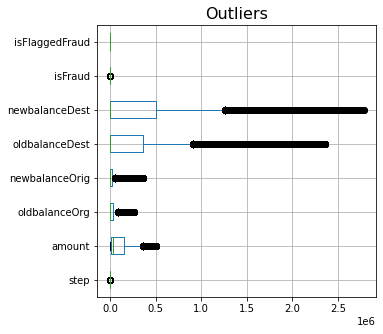

In [13]:
numerical = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(5,5))
df[numerical].boxplot(vert=0)
plt.title('Outliers',fontsize=16)
plt.show()

In [14]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


The outlier treatment has been performed on the specified columns. Here are the results for each column:

amount: Number of outliers: 338,078 (5.314%)
oldbalanceOrg: Number of outliers: 1,112,507 (17.485%)
newbalanceOrig: Number of outliers: 1,053,391 (16.556%)
oldbalanceDest: Number of outliers: 786,135 (12.356%)
newbalanceDest: Number of outliers: 738,527 (11.607%)

The percentages indicate the proportion of outliers relative to the total number of rows in the DataFrame. It contains the remaining data after removing the outliers from the specified columns. The DataFrame has 4,393,187 rows and 11 columns.

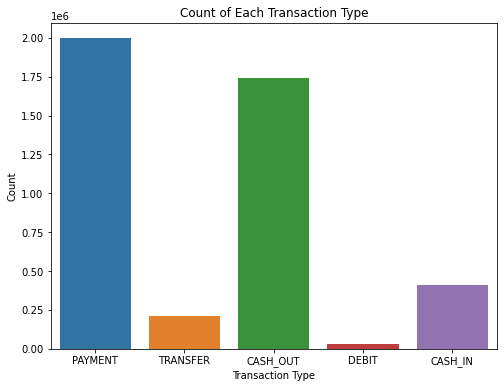

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
#Count of each transaction type
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Count of Each Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


In [20]:
df.isFraud

0          0
1          0
2          1
3          1
4          0
          ..
6362605    1
6362608    1
6362609    1
6362610    1
6362611    1
Name: isFraud, Length: 4393187, dtype: int64

# Model Training

In [21]:
x=df.drop('isFraud',axis=1)
y=df['isFraud']

In [25]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
# Perform label encoding for other object columns
label_encoder = LabelEncoder()
object_columns = df.select_dtypes(include='object').columns
for column in object_columns:
    df_encoded[column] = label_encoder.fit_transform(df[column])

In [26]:
df_encoded.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,523902,170136.0,160296.36,1539204,0.0,0.0,0,0
1,1,3,1864.28,1511999,21249.0,19384.72,1605799,0.0,0.0,0,0
2,1,4,181.00,692124,181.0,0.00,405294,0.0,0.0,1,0
3,1,1,181.00,4025736,181.0,0.00,360980,21182.0,0.0,1,0
4,1,3,11668.14,2380782,41554.0,29885.86,765784,0.0,0.0,0,0


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
# Preprocess the data
X = df_encoded.drop('isFraud', axis=1)
y = df_encoded['isFraud']

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)


In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [34]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9996904299609168
Confusion Matrix:
[[877995      8]
 [   264    371]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    878003
           1       0.98      0.58      0.73       635

    accuracy                           1.00    878638
   macro avg       0.99      0.79      0.87    878638
weighted avg       1.00      1.00      1.00    878638



In [36]:
# Get feature importances
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier.feature_importances_})
# Sort features by importance (descending order)
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

In [37]:
# Display the top features
print(feature_importance.head())

          Feature  Importance
8  newbalanceDest    0.351400
2          amount    0.147992
4   oldbalanceOrg    0.142136
0            step    0.112740
7  oldbalanceDest    0.085311


5. What are the key factors that predict fraudulent customer? 
The feature importance analysis provides valuable insights into which features the model relies on the most to make predictions. In this case, the model appears to place a significant emphasis on newbalanceDest, amount, oldbalanceOrg, step, and oldbalanceDest when identifying fraudulent customers.

Do these factors make sense? If yes, How? If not, How not? 
Yes, We can reevaluate the model's performance using different evaluation metrics like precision, recall, F1-score, and ROC-AUC specifically for the minority class (fraudulent transactions), we can use the previously trained Random Forest Classifier and calculate these metrics on the test set

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred_test = rf_classifier.predict(X_test)



In [39]:
# Calculate precision, recall, and F1-score for the minority class (fraudulent transactions, class 1)
precision_minority = precision_score(y_test, y_pred_test, pos_label=1)
recall_minority = recall_score(y_test, y_pred_test, pos_label=1)
f1_score_minority = f1_score(y_test, y_pred_test, pos_label=1)



In [40]:
# Calculate ROC-AUC score for the minority class
probabilities = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilities of class 1 (fraudulent transactions)
roc_auc_minority = roc_auc_score(y_test, probabilities)

# Print the evaluation metrics
print(f"Precision (Minority Class - Fraudulent Transactions): {precision_minority:.4f}")
print(f"Recall (Minority Class - Fraudulent Transactions): {recall_minority:.4f}")
print(f"F1-score (Minority Class - Fraudulent Transactions): {f1_score_minority:.4f}")
print(f"ROC-AUC (Minority Class - Fraudulent Transactions): {roc_auc_minority:.4f}")

Precision (Minority Class - Fraudulent Transactions): 0.9789
Recall (Minority Class - Fraudulent Transactions): 0.5843
F1-score (Minority Class - Fraudulent Transactions): 0.7318
ROC-AUC (Minority Class - Fraudulent Transactions): 0.9918


The evaluation metrics indicate that the model performs well in identifying fraudulent transactions. The high precision value suggests that the model has a low false positive rate, meaning that it is accurate in flagging suspicious transactions as fraudulent
The F1-score provides an aggregated metric to assess this balance, and a value of 0.7318 indicates that the model achieves a reasonable compromise between precision and recall.

What kind of prevention should be adopted while company update its infrastructure?
The should focus on Data privacy, Data Security. Audits to prevent Fraud.

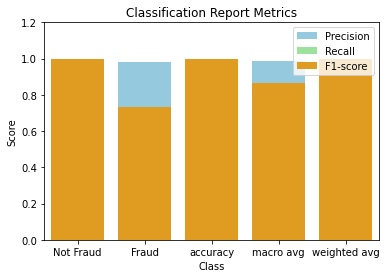

In [42]:
# Plot the classification report metrics
classification_report_df = pd.DataFrame(classification_report(y_test, y_pred_test, target_names=['Not Fraud', 'Fraud'], output_dict=True)).transpose()

plt.figure(figsize=(6, 4))
sns.barplot(x=classification_report_df.index, y=classification_report_df['precision'], color='skyblue', label='Precision')
sns.barplot(x=classification_report_df.index, y=classification_report_df['recall'], color='lightgreen', label='Recall')
sns.barplot(x=classification_report_df.index, y=classification_report_df['f1-score'], color='orange', label='F1-score')
plt.legend()
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Report Metrics')
plt.ylim(0, 1.2)
plt.show()

Assuming these actions have been implemented, how would you determine if they work?

Here are some ways to measure the effectiveness of the security measures:

Security Metrics: Define specific security metrics that align with the implemented security actions. For example, we can track the number of successful intrusion attempts, the frequency of security incidents, the response time to incidents, the percentage of systems with up-to-date security patches, etc.

Penetration Testing: Conduct regular penetration testing and security assessments to simulate real-world attacks and identify any vulnerabilities that may have been missed. Penetration testing helps evaluate the strength of the infrastructure's defenses and provides insights into areas that require further improvement.

Incident Response Drills: Perform incident response drills and exercises to test the efficiency of the incident response plan. These exercises can help identify potential gaps in the response process and allow the team to practice their response to security incidents.

Audits and Compliance Checks: Conduct regular internal and external security audits to assess compliance with security policies, industry standards, and data protection regulations. Audits help identify any deviations from the security measures and ensure that the infrastructure remains compliant with relevant requirements.

User Training and Awareness: Assess the level of user awareness and adherence to security practices through training and awareness programs. Conduct quizzes or surveys to evaluate user knowledge of security best practices and identify areas that may need further education.

Threat Intelligence Analysis: Monitor and analyze threat intelligence data to identify any emerging threats or patterns that could potentially impact the infrastructure. This proactive approach helps ensure that the infrastructure remains protected against evolving threats.

Performance Monitoring: Implement performance monitoring of the infrastructure to identify any unusual behavior or anomalies that may indicate a security incident. Real-time monitoring allows for timely detection and response to potential security breaches.

Feedback from Security Team: Regularly solicit feedback from the security team and IT staff regarding the effectiveness of the implemented security measures. The team's insights and observations can provide valuable feedback on the overall security posture.

External Assessments: Engage external security consultants or ethical hackers to conduct independent security assessments. External assessments offer an objective perspective on the infrastructure's security and can help identify blind spots.

Security Incident Analysis: Analyze past security incidents to determine if the implemented security measures effectively mitigated or prevented further escalation. This analysis can help identify areas for improvement in the incident response process.

Red Team Exercises: Organize red team exercises where a group of security experts simulates an attack on the infrastructure to evaluate its resilience and identify areas for improvement.

By regularly performing these evaluations and assessments, the organization can gain confidence in the effectiveness of the implemented security measures. It's important to remember that security is an ongoing process, and continuous monitoring, analysis, and improvement are necessary to stay ahead of potential threats and maintain a robust security posture.